## Import Required Libraries

In [1]:
# Download from the internet if not already installed
import sys
!{sys.executable} -m pip install numpy > /dev/null
!{sys.executable} -m pip install matplotlib > /dev/null
# download tensorflow-gpu instead if you have a graphics card
# go to: https://www.tensorflow.org/install/gpu
!{sys.executable} -m pip install tensorflow > /dev/null

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Importing and processing our data

In [3]:
PATH = '../data/'

train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')
test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=128,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(224, 224),
                                                           class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=128,
                                                         directory=test_dir,
                                                         target_size=(224, 224),
                                                         class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [6]:
train_data_gen.image_shape

(224, 224, 3)

### Showcase of some images

In [7]:
def plot_images(img_arr):
    fig, axes = plt.subplots(1, 5, figsize=(25, 25))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

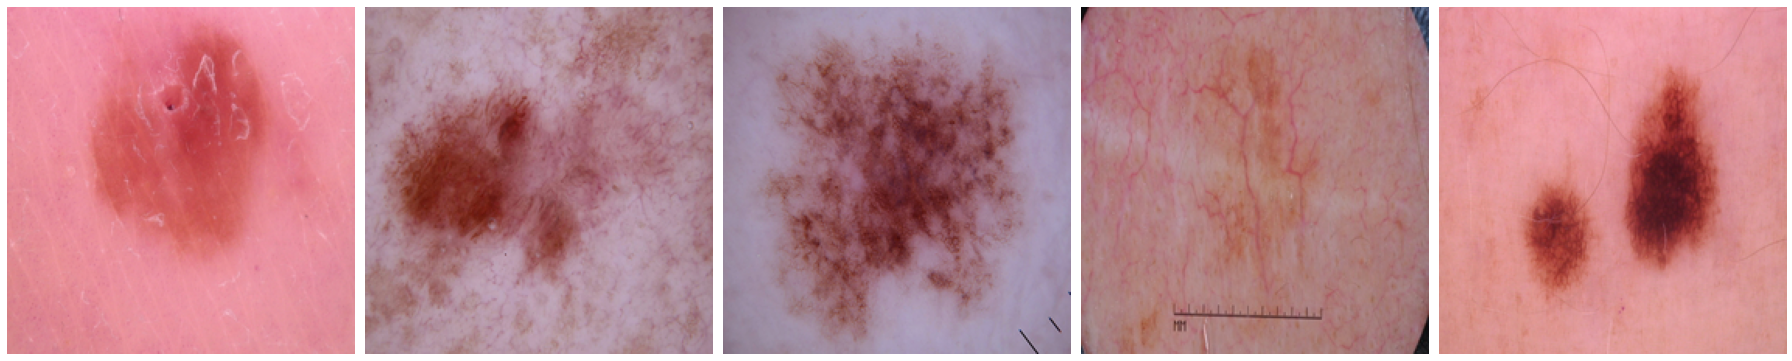

In [8]:
sample_training_images, _ = next(train_data_gen)

plot_images(sample_training_images[:5])

## Creating a Machine Learning Model with Keras

In [17]:
model = Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam', loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

In [12]:
total_train_size = len(os.listdir(train_benign_dir)) + len(os.listdir(train_malignant_dir))
total_test_size = len(os.listdir(test_benign_dir)) + len(os.listdir(test_malignant_dir))

In [20]:
history = model.fit(train_data_gen,
         batch_size=128,
         epochs=5,
         steps_per_epoch=total_train_size // 128,
         validation_data=test_data_gen,
         validation_steps=total_test_size // 128)

Epoch 1/2
20/20 [==============================] - 136s 7s/step - loss: 1.1817 - accuracy: 0.5286 - val_loss: 0.6564 - val_accuracy: 0.5484
Epoch 2/2
20/20 [==============================] - 134s 7s/step - loss: 0.6188 - accuracy: 0.6192 - val_loss: 0.4720 - val_accuracy: 0.7812


## Results

In [15]:
history.history

{'loss': [0.6928216814994812, 0.6923630237579346],
 'accuracy': [0.5428457260131836, 0.5500199198722839],
 'val_loss': [0.6925936937332153, 0.6921499371528625],
 'val_accuracy': [0.546875, 0.5484374761581421]}

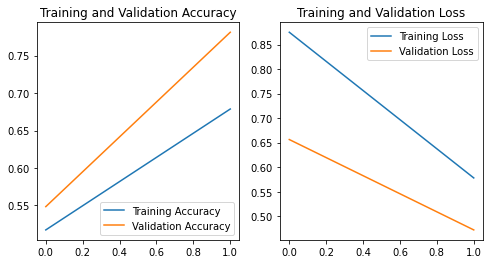

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()